In [12]:
from sklearn import model_selection
from keras import Sequential
from keras import datasets
from keras.layers import *
from keras.models import *
from keras.optimizers import Adam
from keras import losses
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [13]:
# import os, sys
# from IPython.display import display
# from IPython.display import Image as _Imgdis
# from PIL import Image
# import numpy as np
# from time import time
# from time import sleep
# from scipy import ndimage
# from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# folder = "/home/strahinja/Desktop/git/sudoku_solver/train_digits/digits/"

# onlyfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]

# files = []
# y = []
# i=0
# for _file in onlyfiles:
#     files.append(_file)
#     label_in_file = _file.rfind("_")
#     label_in_file = label_in_file + 1
#     y.append(int(_file[label_in_file:label_in_file + 1]))

# image_size = 30

# x = np.ndarray(shape=(len(files), image_size, image_size),
#                      dtype=int)

# i = 0
# for _file in files:
#     img = load_img(folder + "/" + _file)
#     img.thumbnail((image_size, image_size))
#     img = img_to_array(img)
#     img = img.reshape(image_size, image_size, 3)
#     img = np.mean(img, axis = 2)
#     x[i] = img
#     i += 1
    
# print(type(x))

In [14]:
# np.save('dataset_x', x)
# np.save('dataset_y', y)

In [15]:
x = np.load('dataset_x.npy')
y = np.load('dataset_y.npy')

6


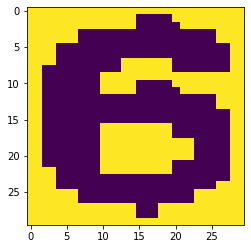

In [19]:
plt.imshow(x[3652])
print(y[3652])

In [31]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.33, random_state = 7, stratify = y)

In [32]:
image_size = 30
network = Sequential()
network.add(Conv2D(input_shape=(image_size, image_size, 1), filters=32, kernel_size=(3,3), strides=(1,1), padding='same'))
network.add(MaxPooling2D(pool_size=(2,2), strides=(1,1)))
network.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same'))
network.add(MaxPooling2D(pool_size=(2,2), strides=(1,1)))
network.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same'))
network.add(MaxPooling2D(pool_size=(2,2), strides=(1,1)))
network.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same'))
network.add(MaxPooling2D(pool_size=(2,2), strides=(1,1)))
network.add(Flatten())
network.add(Dense(units=32, activation='relu'))
network.add(Dense(units=10, activation='softmax'))

In [33]:
network.compile(optimizer='adam', loss = losses.categorical_crossentropy, metrics=['acc'])

In [34]:
x_train[0].shape

(30, 30)

In [35]:
x_train = x_train / 255
x_test = x_test / 255

x_train.shape

(67067, 30, 30)

In [36]:
x_train = x_train.reshape(x_train.shape[0], x_train[0].shape[0], x_train[0].shape[0], 1)
x_test = x_test.reshape(x_test.shape[0], x_test[0].shape[0], x_test[0].shape[0], 1)
x_train.shape

(67067, 30, 30, 1)

In [37]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [38]:
history = network.fit(x_train, y_train, batch_size=64, epochs=10, verbose=1)

Epoch 1/10
67067/67067 [==============================] - 120s 2ms/step - loss: 0.0151 - acc: 0.9945
Epoch 2/10
67067/67067 [==============================] - 114s 2ms/step - loss: 3.3002e-07 - acc: 1.0000
Epoch 3/10
67067/67067 [==============================] - 115s 2ms/step - loss: 2.0619e-07 - acc: 1.0000
Epoch 4/10
67067/67067 [==============================] - 115s 2ms/step - loss: 1.5940e-07 - acc: 1.0000
Epoch 5/10
67067/67067 [==============================] - 114s 2ms/step - loss: 1.3659e-07 - acc: 1.0000
Epoch 6/10
67067/67067 [==============================] - 150s 2ms/step - loss: 1.2677e-07 - acc: 1.0000
Epoch 7/10
67067/67067 [==============================] - 113s 2ms/step - loss: 1.2208e-07 - acc: 1.0000
Epoch 8/10
67067/67067 [==============================] - 113s 2ms/step - loss: 1.1976e-07 - acc: 1.0000
Epoch 9/10
67067/67067 [==============================] - 113s 2ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 10/10
67067/67067 [==============================] - 

In [39]:
network.evaluate(x_test, y_test)

33033/33033 [==============================] - 19s 579us/step


[1.1920928955078125e-07, 1.0]

In [ ]:
x = x / 255

In [41]:
x = x.reshape(x.shape[0], x[0].shape[0], x[0].shape[0], 1)
y = to_categorical(y, num_classes=10)

In [42]:
history = network.fit(x, y, batch_size=64, epochs=10, verbose=1)

Epoch 1/10
100100/100100 [==============================] - 164s 2ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 2/10
100100/100100 [==============================] - 167s 2ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 3/10
100100/100100 [==============================] - 167s 2ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 4/10
100100/100100 [==============================] - 168s 2ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 5/10
100100/100100 [==============================] - 169s 2ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 6/10
100100/100100 [==============================] - 166s 2ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 7/10
100100/100100 [==============================] - 168s 2ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 8/10
100100/100100 [==============================] - 168s 2ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 9/10
100100/100100 [==============================] - 168s 2ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 10/10
100100/100100 [==========

In [43]:
network.save('neural.hdf5')